In [1]:
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping
from sklearn.preprocessing import StandardScaler

import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
import collections
%matplotlib inline

Using TensorFlow backend.
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/jocelyn/opt/anaconda3/lib/pytho

In [3]:
path = glob.glob('../TrafficNet/TrafficNetToVolvo_Flow/*.csv')

X_all = np.empty((1, 51))
Y_all = np.empty((1,))

#for i in range(len(path)):
for i in range(1):
    print(i)
    
    Flow = pd.read_csv(path[i], usecols=['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','Flow','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7'])
    
    Flow.fillna(-1, inplace=True)
    
    Y_train = np.array(Flow['Flow'].values)
    X_train = np.array(Flow[['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7']])
             
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]
             
    #print('dimof_input_train: ', dimof_input)
    #print('dimof_output_train: ', dimof_output)

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    # Set y as categorical data
    #Y_train = np_utils.to_categorical(Y_train, dimof_output)
    #print(len(Y_train))
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(104548, 51) (104548,)


In [8]:
CutIn = pd.read_csv(path[1],usecols=['Device','Trip','LatitudeWsu','LongitudeWsu','GpsHeadingWsu','SpeedWsu','AxWsu','Flow','CutIn','Following','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7'])
CutIn.fillna(-1, inplace=True)
    

In [9]:
CutIn.head()

,Device,Trip,LatitudeWsu,LongitudeWsu,GpsHeadingWsu,SpeedWsu,AxWsu,Flow,CutIn,Following,...,tt5,tt6,tt7,c1,c2,c3,c4,c5,c6,c7
0,17103,102,42.272,-83.741,357.68,38.960,0.17832,0,0,1,...,-1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
1,17103,102,42.272,-83.741,357.57,39.104,0.16653,0,0,1,...,-1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
2,17103,102,42.272,-83.741,357.02,38.954,0.07353,0,0,1,...,-1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
3,17103,102,42.272,-83.741,356.85,38.954,0.07353,0,0,1,...,-1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0
4,17103,102,42.272,-83.741,357.76,38.980,0.07353,0,0,1,...,-1.0,-1.0,-1.0,1.0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0


In [4]:
len(X_all)

1122477

In [5]:
X_all = X_all[1:1122477]
Y_all = Y_all[1:1122477]

# Feature selection

## ANOVA f-test Feature Selection

In [6]:
# example of anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot

In [7]:
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 19 26 33 40 47] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Feature 0: 25078.038198
Feature 1: 22734.632113
Feature 2: 104.884683
Feature 3: 289.108022
Feature 4: 287.535940
Feature 5: 182.705498
Feature 6: 447.287672
Feature 7: 1022.229208
Feature 8: 1890.330672
Feature 9: 260431.315926
Feature 10: 54497.824963
Feature 11: 14130.398196
Feature 12: nan
Feature 13: 0.044512
Feature 14: 23.194264
Feature 15: 17.624953
Feature 16: 192673.836787
Feature 17: 50780.629273
Feature 18: 13499.301658
Feature 19: nan
Feature 20: 0.087435
Feature 21: 21.317883
Feature 22: 22.524231
Feature 23: 2.411370
Feature 24: 18.000309
Feature 25: 727.294392
Feature 26: nan
Feature 27: 10.087186
Feature 28: 22.761554
Feature 29: 12.829422
Feature 30: 13242.203876
Feature 31: 3718.113313
Feature 32: 1628.700265
Feature 33: nan
Feature 34: 0.001517
Feature 35: 14.685874
Feature 36: 5.639251
Feature 37: 214921.855630
Feature 38: 46676.339044
Feature 39: 12145.322004
Feature 40: nan
Feature 41: 1.801237
Feature 42: 7.846326
Feature 43: 13.576260
Feature 44: 446134.098546


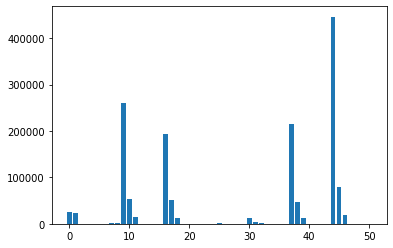

In [8]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# Modeling With Selected Features

## Model Built Using All Features

In [9]:
# evaluation of a model using all input features
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# split into train and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
# evaluate the model
yhat = model.predict(X_test)
# evaluate predictions
accuracy = accuracy_score(y_test, yhat)
print('Accuracy: %.2f' % (accuracy*100))

Accuracy: 85.21


## Model Built Using ANOVA f-test Features

In [11]:
# evaluation of a model using 4 features chosen with anova f-test
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# feature selection
def select_features_self(X_train, y_train, X_test):
	# configure to select a subset of features
	fs = SelectKBest(score_func=f_classif, k=15)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

# feature selection
X_train_fs, X_test_fs, fs = select_features_self(X_train, y_train, X_test)
# fit the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
# evaluate the model
yhat_anova = model.predict(X_test_fs)
# evaluate predictions
accuracy_anova = accuracy_score(y_test, yhat_anova)
print('Accuracy: %.2f' % (accuracy_anova*100))

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 19 26 33 40 47] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Accuracy: 85.15


## Tune the Number of Selected Features

In [1]:
from pandas import read_csv
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from matplotlib import pyplot
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [8]:
path = glob.glob('../TrafficNet/TrafficNetToVolvo_Flow/*.csv')

X_all = np.empty((1, 51))
Y_all = np.empty((1,))

for i in range(1):
    print(i)
    
    Flow = pd.read_csv(path[i], usecols=['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','Flow','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7'])
    
    Flow.fillna(-1, inplace=True)
    
    Y_train = np.array(Flow['Flow'].values)
    X_train = np.array(Flow[['LatitudeWsu','LongitudeWsu','GpsHeadingWsu','GpsSpeedWsu','SpeedWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o3','o4','o5','o6','o7','r1','r2','r3','r4','r5','r6','r7','rr1','rr2','rr3','rr4','rr5','rr6','rr7','t1','t2','t3','t4','t5','t6','t7','tt1','tt2','tt3','tt4','tt5','tt6','tt7','c1','c2','c3','c4','c5','c6','c7']])
             
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1)
    dimof_output = 1
    dimof_input = X_train.shape[1]
             
    #print('dimof_input_train: ', dimof_input)
    #print('dimof_output_train: ', dimof_output)

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    # Set y as categorical data
    #Y_train = np_utils.to_categorical(Y_train, dimof_output)
    #print(len(Y_train))
    
    X_all = np.append(X_all, X_train, axis=0)
    Y_all = np.append(Y_all, Y_train, axis=0)

0
(104548, 51) (104548,)


In [9]:
len(X_all)

104549

In [10]:
X_all = X_all[1:104549]
Y_all = Y_all[1:104549]

In [11]:
# compare different numbers of features selected using anova f-test


# define the evaluation method
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
# define the pipeline to evaluate
model = LogisticRegression(solver='liblinear')
fs = SelectKBest(score_func=f_classif)
pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
# define the grid
grid = dict()
grid['anova__k'] = [i+1 for i in range(X_all.shape[1])]
# define the grid search
search = GridSearchCV(pipeline, grid, scoring='accuracy', n_jobs=-1, cv=cv)
# perform the search
results = search.fit(X_all, Y_all)
# summarize best
print('Best Mean Accuracy: %.3f' % results.best_score_)
print('Best Config: %s' % results.best_params_)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 19 26 33 40 47] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Best Mean Accuracy: 0.857
Best Config: {'anova__k': 22}


>1 0.856 (0.002)
>2 0.852 (0.013)
>3 0.856 (0.002)
>4 0.856 (0.002)
>5 0.856 (0.002)
>6 0.856 (0.002)
>7 0.856 (0.002)
>8 0.856 (0.002)
>9 0.856 (0.002)
>10 0.856 (0.002)
>11 0.856 (0.002)
>12 0.855 (0.002)
>13 0.855 (0.002)
>14 0.856 (0.002)
>15 0.857 (0.002)
>16 0.856 (0.002)
>17 0.856 (0.002)
>18 0.856 (0.002)
>19 0.856 (0.002)
>20 0.856 (0.002)
>21 0.856 (0.002)
>22 0.857 (0.002)
>23 0.856 (0.002)
>24 0.856 (0.002)
>25 0.856 (0.002)
>26 0.856 (0.002)
>27 0.856 (0.002)
>28 0.855 (0.002)
>29 0.855 (0.002)
>30 0.855 (0.002)
>31 0.855 (0.002)
>32 0.855 (0.002)
>33 0.855 (0.002)
>34 0.855 (0.002)
>35 0.855 (0.002)
>36 0.855 (0.002)
>37 0.855 (0.002)
>38 0.855 (0.002)
>39 0.855 (0.002)
>40 0.855 (0.002)
>41 0.855 (0.002)
>42 0.855 (0.002)
>43 0.855 (0.002)
>44 0.855 (0.002)
>45 0.855 (0.002)
>46 0.855 (0.002)
>47 0.855 (0.002)
>48 0.855 (0.002)
>49 0.855 (0.002)
>50 0.855 (0.002)
>51 0.855 (0.002)


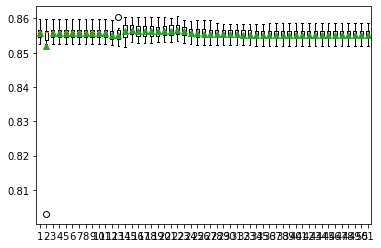

In [12]:
# compare different numbers of features selected using anova f-test


# evaluate a give model using cross-validation
def evaluate_model(model):
	cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X_all, Y_all, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores

# define number of features to evaluate
num_features = [i+1 for i in range(X_all.shape[1])]
# enumerate each number of features
results = list()
for k in num_features:
	# create pipeline
	model = LogisticRegression(solver='liblinear')
	fs = SelectKBest(score_func=f_classif, k=k)
	pipeline = Pipeline(steps=[('anova',fs), ('lr', model)])
	# evaluate the model
	scores = evaluate_model(pipeline)
	results.append(scores)
	# summarize the results
	print('>%d %.3f (%.3f)' % (k, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=num_features, showmeans=True)
pyplot.show()

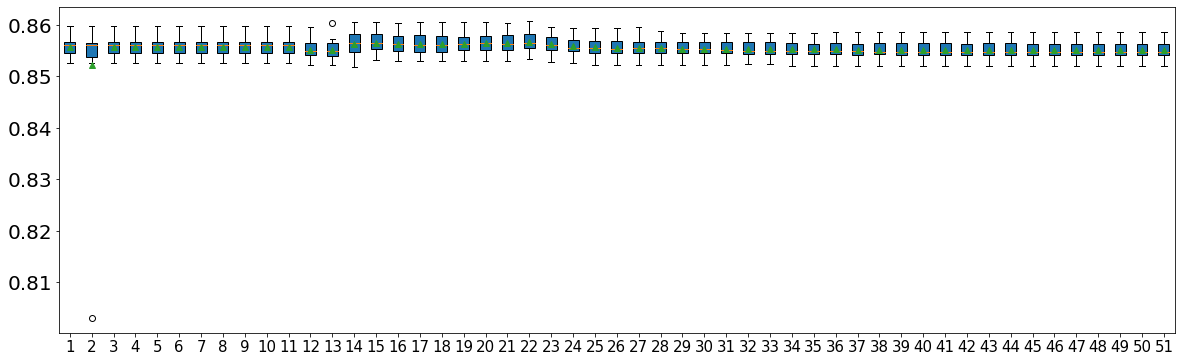

In [13]:
pyplot.figure(figsize=(20,6))
pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
pyplot.xticks(fontsize=15)
pyplot.yticks(fontsize=20)
pyplot.show()

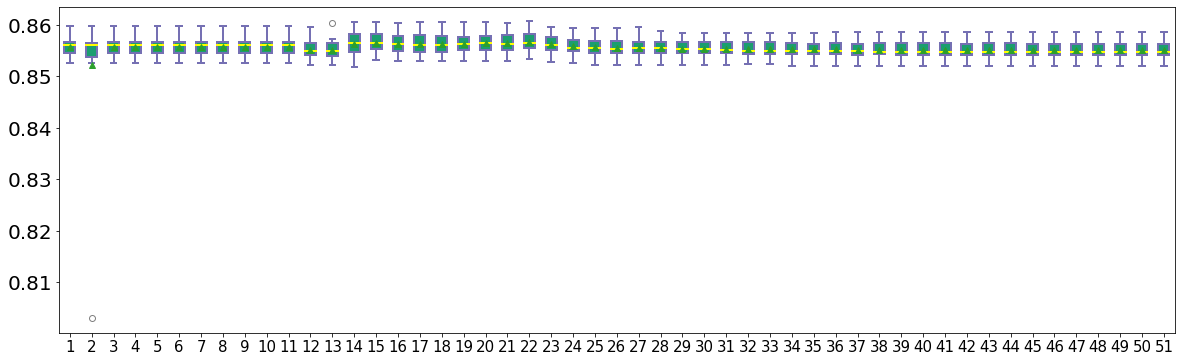

In [14]:
pyplot.figure(figsize=(20,6))
pyplot.xticks(fontsize=15)
pyplot.yticks(fontsize=20)

bp = pyplot.boxplot(results, labels=num_features, showmeans=True, patch_artist=True)
#ax = fig.add_subplot(111)
for box in bp['boxes']:
    # change outline color
    box.set( color='#7570b3', linewidth=2)
    # change fill color
    box.set( facecolor = '#1b9e70' )

## change color and linewidth of the whiskers
for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

## change color and linewidth of the caps
for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

## change color and linewidth of the medians
for median in bp['medians']:
    median.set(color='yellow', linewidth=2)

## change the style of fliers and their fill
for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)

## the final 22 features

In [15]:
# feature selection
def select_features(X_train, y_train, X_test, n):
	# configure to select all features
	fs = SelectKBest(score_func=f_classif, k=n)
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 19 26 33 40 47] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Feature 0: 31.092807
Feature 1: 1157.822474
Feature 2: 51.175292
Feature 3: 77.595928
Feature 4: 77.360080
Feature 5: 6.426418
Feature 6: 120.479339
Feature 7: 78.694461
Feature 8: 1113.991200
Feature 9: 21036.127711
Feature 10: 4883.448301
Feature 11: 1650.571702
Feature 12: nan
Feature 13: 7.726885
Feature 14: 13.881251
Feature 15: 0.197436
Feature 16: 10844.395878
Feature 17: 4031.946435
Feature 18: 1524.235485
Feature 19: nan
Feature 20: 20.274120
Feature 21: 15.497856
Feature 22: 0.324481
Feature 23: 84.103978
Feature 24: 107.660572
Feature 25: 16.157918
Feature 26: nan
Feature 27: 7.852826
Feature 28: 2.252885
Feature 29: 0.320645
Feature 30: 1249.715525
Feature 31: 310.952423
Feature 32: 119.057997
Feature 33: nan
Feature 34: 1.309990
Feature 35: 9.983767
Feature 36: 0.079400
Feature 37: 20864.953954
Feature 38: 6257.578115
Feature 39: 2219.746971
Feature 40: nan
Feature 41: 1.878084
Feature 42: 18.498158
Feature 43: 0.007270
Feature 44: 28023.044949
Feature 45: 8116.413567
Feat

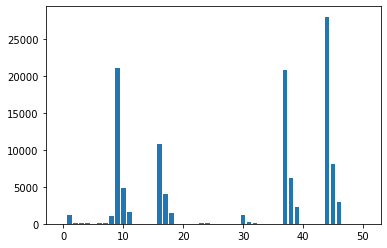

In [16]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_all, Y_all, test_size=0.5, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test, 22)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [17]:
fs.get_support(indices=True)

array([ 1,  3,  6,  7,  8,  9, 10, 11, 16, 17, 18, 23, 24, 30, 31, 32, 37,
       38, 39, 44, 45, 46])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:114: UserWarning: Features [12 19 26 33 40 47] are constant.
  UserWarning)
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/sklearn/feature_selection/univariate_selection.py:115: RuntimeWarning: invalid value encountered in true_divide
  f = msb / msw


Feature 0: 31.092807
Feature 1: 1157.822474
Feature 2: 51.175292
Feature 3: 77.595928
Feature 4: 77.360080
Feature 5: 6.426418
Feature 6: 120.479339
Feature 7: 78.694461
Feature 8: 1113.991200
Feature 9: 21036.127711
Feature 10: 4883.448301
Feature 11: 1650.571702
Feature 12: nan
Feature 13: 7.726885
Feature 14: 13.881251
Feature 15: 0.197436
Feature 16: 10844.395878
Feature 17: 4031.946435
Feature 18: 1524.235485
Feature 19: nan
Feature 20: 20.274120
Feature 21: 15.497856
Feature 22: 0.324481
Feature 23: 84.103978
Feature 24: 107.660572
Feature 25: 16.157918
Feature 26: nan
Feature 27: 7.852826
Feature 28: 2.252885
Feature 29: 0.320645
Feature 30: 1249.715525
Feature 31: 310.952423
Feature 32: 119.057997
Feature 33: nan
Feature 34: 1.309990
Feature 35: 9.983767
Feature 36: 0.079400
Feature 37: 20864.953954
Feature 38: 6257.578115
Feature 39: 2219.746971
Feature 40: nan
Feature 41: 1.878084
Feature 42: 18.498158
Feature 43: 0.007270
Feature 44: 28023.044949
Feature 45: 8116.413567
Feat

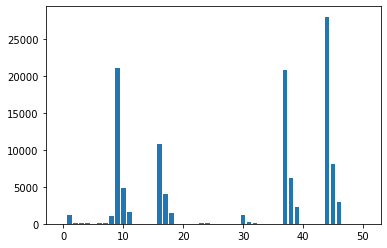

In [18]:
X_train_fs13, X_test_fs13, fs13 = select_features(X_train, y_train, X_test, 13)
# what are scores for the features
for i in range(len(fs13.scores_)):
	print('Feature %d: %f' % (i, fs13.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs13.scores_))], fs13.scores_)
pyplot.show()

In [19]:
fs13.get_support(indices=True)

array([ 9, 10, 11, 16, 17, 18, 30, 37, 38, 39, 44, 45, 46])

# Train model

In [11]:
# Set up a 'look back' dataset for sequence to label prediction with Keras.

# The LSTM network expects the input data (X) to be provided with a specific
# array structure in the form of: [samples, time steps, features].

# create_dataset is adapted from
# http://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/

def create_dataset(X, Y, **options):
    """Convert an array of X, Y values into a dataset matrix for and LSTM"""
    
    look_back = options.pop('look_back', None)
    dataX, dataY = [], []
    for i in range(len(X) - look_back):
        a = X[i:(i+look_back)]
        dataX.append(a)
        dataY.append(Y[i + look_back - 1])
    return np.array(dataX), np.array(dataY)

# Predictions will be based on look_back minutes of data:
look_back = 50

[ 1,  3,  6,  7,  8,  9, 10, 11, 16, 17, 18, 23, 24, 30, 31, 32, 37,
       38, 39, 44, 45, 46]
       ['LatitudeWsu','GpsHeadingWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading',
       'o1','o2','o7','r1','r2','r7','rr1','rr7','t1','t2','t7','tt1','tt2','tt7','c1','c2']
             
LatitudeWsu,GpsHeadingWsu,AxWsu,LaneDistanceLeft,LaneDistanceRight,LaneHeading,
o1,o2,o6,o7,r1,r6','r7,rr6','rr7','t1,t6,t7','tt1,tt7','c1
array([ 9, 10, 11, 16, 17, 18, 30, 37, 38, 39, 44, 45, 46])

In [3]:
path = glob.glob('../TrafficNet/TrafficNetToVolvo_Flow/*.csv')

X_all = np.empty((1, 50, 22))
Y_all = np.empty((1,))

for i in range(5):
    print(i)
    Flow = pd.read_csv(path[i], usecols=['LatitudeWsu','GpsHeadingWsu','AxWsu','Flow','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o6','o7','r1','r6','r7','rr6','rr7','t1','t6','t7','tt1','tt7','c1','c2'])
    
    Flow.fillna(-1, inplace=True)
    
    Y_train = np.array(Flow['Flow'].values)
    X_train = np.array(Flow[['LatitudeWsu','GpsHeadingWsu','AxWsu','LaneDistanceLeft','LaneDistanceRight','LaneHeading','o1','o2','o6','o7','r1','r6','r7','rr6','rr7','t1','t6','t7','tt1','tt7','c1','c2']])
    
             
    # Get dimensions of input and output
    #dimof_output = int(np.max(Y_train) + 1) 
    dimof_output = 1
    dimof_input = X_train.shape[1]
             
    #print('dimof_input_train: ', dimof_input)
    #print('dimof_output_train: ', dimof_output)

    # Scale/whiten the X data
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    #print(len(X_train))
    print(X_train.shape, Y_train.shape)
    
    # Set y as categorical data
    #Y_train = np_utils.to_categorical(Y_train, dimof_output)
    #print(len(Y_train))
    
    X, Y = create_dataset(X_train, Y_train, look_back=look_back)
    print(X.shape, Y.shape)
    
    X_all = np.append(X_all, X, axis=0)
    Y_all = np.append(Y_all, Y, axis=0)

0
(104548, 22) (104548,)
(104498, 50, 22) (104498,)
1
(104556, 22) (104556,)
(104506, 50, 22) (104506,)
2
(109888, 22) (109888,)
(109838, 50, 22) (109838,)
3
(103795, 22) (103795,)
(103745, 50, 22) (103745,)
4
(104049, 22) (104049,)
(103999, 50, 22) (103999,)


In [4]:
(len(X_all)//64)*64 + 1

526529

In [5]:
X_all = X_all[1:526529]
Y_all = Y_all[1:526529]

collections.Counter(Y_all)

Counter({0.0: 262156, 1.0: 264372})

In [6]:
457473/(457473+420671)
262156/264372

0.9916178717867248

In [7]:
# Create the LSTM network.
batch_size = 32
dropout = 0.5
num_epoch = 100
earlyStopping = EarlyStopping(monitor='val_loss', patience=0, verbose=0, mode='auto')
weights = {0:1, 1:1}

In [8]:
model_Flow1 = Sequential()
model_Flow1.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow1.add(Dropout(dropout))
model_Flow1.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  after removing the cwd from sys.path.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [9]:
model_Flow1.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 10)                  1320      
_________________________________________________________________
dropout_1 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_1 (Dense)              (32, 1)                   11        
Total params: 1,331
Trainable params: 1,331
Non-trainable params: 0
_________________________________________________________________


In [10]:
history1 = model_Flow1.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 323584 samples, validate on 323584 samples
Epoch 1/100
323584/323584 [==============================] - 1608s 5ms/step - loss: 0.2767 - accuracy: 0.8911 - val_loss: 0.3586 - val_accuracy: 0.9053
Epoch 2/100
323584/323584 [==============================] - 1440s 4ms/step - loss: 0.2296 - accuracy: 0.9019 - val_loss: 0.3982 - val_accuracy: 0.9027


In [11]:
history1.history

{'val_loss': [0.3585812792992507, 0.39815385163110384],
 'val_accuracy': [0.9053352475166321, 0.9026805758476257],
 'loss': [0.2766787245902056, 0.22956584702589242],
 'accuracy': [0.8911071, 0.9019296]}

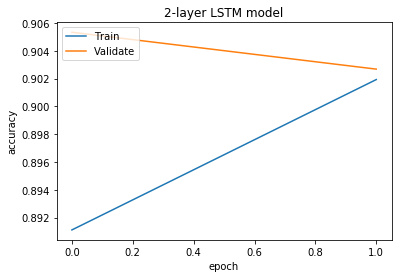

In [12]:
# Plot history for training and validation loss.

plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('2-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

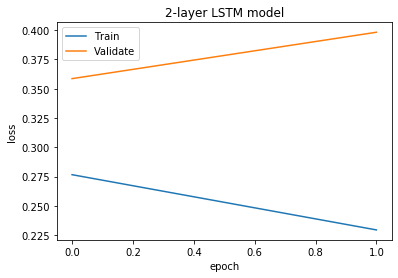

In [13]:
# Plot history for training and validation loss.

plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('2-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [14]:
model_Flow2 = Sequential()
model_Flow2.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow2.add(Dropout(dropout))
model_Flow2.add(Dense(30, activation='relu'))
model_Flow2.add(Dropout(dropout))
model_Flow2.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow2.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [10]:
model_Flow2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (32, 10)                  1320      
_________________________________________________________________
dropout_1 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_1 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_2 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_2 (Dense)              (32, 1)                   31        
Total params: 1,681
Trainable params: 1,681
Non-trainable params: 0
_________________________________________________________________


In [15]:
history2 = model_Flow2.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 323584 samples, validate on 323584 samples
Epoch 1/100
323584/323584 [==============================] - 1578s 5ms/step - loss: 0.2686 - accuracy: 0.8919 - val_loss: 0.3108 - val_accuracy: 0.8989
Epoch 2/100
323584/323584 [==============================] - 1642s 5ms/step - loss: 0.2190 - accuracy: 0.9131 - val_loss: 0.3508 - val_accuracy: 0.8914


In [16]:
history2.history

{'val_loss': [0.31081513656269316, 0.35084598230142644],
 'val_accuracy': [0.8988949060440063, 0.8913882970809937],
 'loss': [0.26856552319464133, 0.21898908801343664],
 'accuracy': [0.89192915, 0.9131292]}

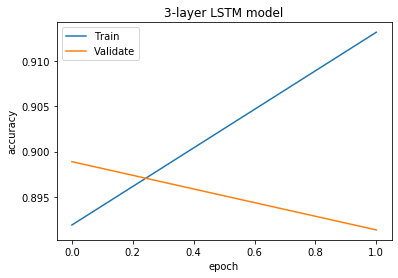

In [17]:
# Plot history for training and validation loss.

plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('3-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

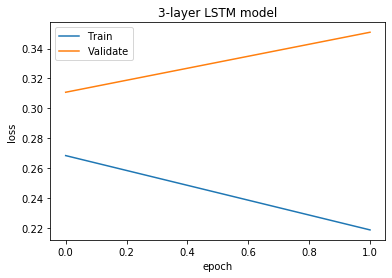

In [18]:
# Plot history for training and validation loss.

plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('3-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [8]:
model_Flow3 = Sequential()
model_Flow3.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow3.add(Dropout(dropout))
model_Flow3.add(Dense(30, activation='relu'))
model_Flow3.add(Dropout(dropout))
model_Flow3.add(Dense(30, activation='relu'))
model_Flow3.add(Dropout(dropout))
model_Flow3.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow3.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  


In [16]:
model_Flow3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (32, 10)                  1320      
_________________________________________________________________
dropout_3 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_3 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_4 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_4 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_5 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_5 (Dense)              (32, 1)                  

In [9]:
history3 = model_Flow3.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  



Train on 263264 samples, validate on 263264 samples
Epoch 1/100
263264/263264 [==============================] - 852s 3ms/step - loss: 0.2700 - accuracy: 0.8989 - val_loss: 0.3353 - val_accuracy: 0.9147
Epoch 2/100
263264/263264 [==============================] - 909s 3ms/step - loss: 0.2126 - accuracy: 0.9124 - val_loss: 0.3873 - val_accuracy: 0.9199


In [10]:
history3.history

{'val_loss': [0.33527658276440353, 0.38729909211473085],
 'val_accuracy': [0.9146522283554077, 0.9198675155639648],
 'loss': [0.26997520369561906, 0.2125726067203536],
 'accuracy': [0.898862, 0.9124339]}

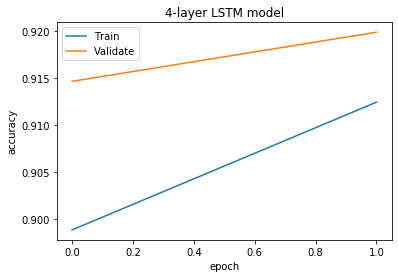

In [11]:
# Plot history for training and validation loss.

plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('4-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

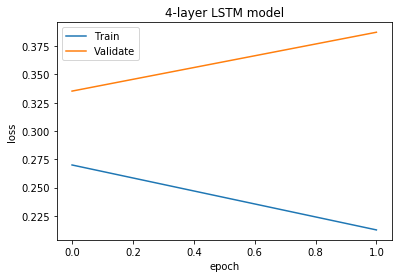

In [12]:
# Plot history for training and validation loss.

plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('4-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [13]:
model_Flow4 = Sequential()
model_Flow4.add(LSTM(output_dim=10, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(30, activation='relu'))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(30, activation='relu'))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(10, activation='relu'))
model_Flow4.add(Dropout(dropout))
model_Flow4.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow4.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=10)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [22]:
model_Flow4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (32, 10)                  1320      
_________________________________________________________________
dropout_6 (Dropout)          (32, 10)                  0         
_________________________________________________________________
dense_6 (Dense)              (32, 30)                  330       
_________________________________________________________________
dropout_7 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_7 (Dense)              (32, 30)                  930       
_________________________________________________________________
dropout_8 (Dropout)          (32, 30)                  0         
_________________________________________________________________
dense_8 (Dense)              (32, 10)                 

In [14]:
history4 = model_Flow4.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 263264 samples, validate on 263264 samples
Epoch 1/100
263264/263264 [==============================] - 1189s 5ms/step - loss: 0.2743 - accuracy: 0.8900 - val_loss: 0.3130 - val_accuracy: 0.9256
Epoch 2/100
263264/263264 [==============================] - 1060s 4ms/step - loss: 0.2171 - accuracy: 0.9013 - val_loss: 0.3691 - val_accuracy: 0.9257


In [15]:
history4.history

{'val_loss': [0.31304187141360973, 0.369082155037765],
 'val_accuracy': [0.9255766272544861, 0.9257057309150696],
 'loss': [0.2742800405302205, 0.21708896892785778],
 'accuracy': [0.89004195, 0.90134996]}

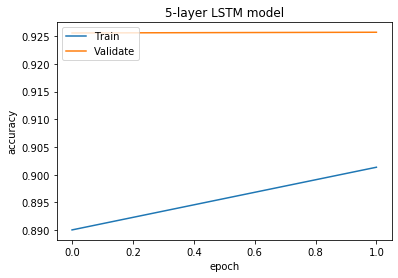

In [16]:
# Plot history for training and validation loss.

plt.plot(history4.history['accuracy'])
plt.plot(history4.history['val_accuracy'])
plt.title('5-layer LSTM model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

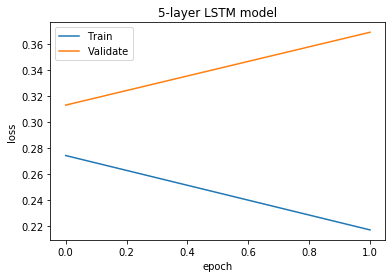

In [17]:
# Plot history for training and validation loss.

plt.plot(history4.history['loss'])
plt.plot(history4.history['val_loss'])
plt.title('5-layer LSTM model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [20]:
model_Flow5 = Sequential()
model_Flow5.add(LSTM(output_dim=20, batch_input_shape=[batch_size, look_back, dimof_input]))
model_Flow5.add(Dropout(dropout))
model_Flow5.add(Dense(40, activation='relu'))
model_Flow5.add(Dropout(dropout))
model_Flow5.add(Dense(40, activation='relu'))
model_Flow5.add(Dropout(dropout))
model_Flow5.add(Dense(20, activation='relu'))
model_Flow5.add(Dropout(dropout))
model_Flow5.add(Dense(dimof_output, init='uniform', activation='sigmoid'))
model_Flow5.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(batch_input_shape=[32, 50, 2..., units=20)`
  
/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, activation="sigmoid", kernel_initializer="uniform")`
  # Remove the CWD from sys.path while we load stuff.


In [21]:
model_Flow5.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (32, 20)                  3440      
_________________________________________________________________
dropout_8 (Dropout)          (32, 20)                  0         
_________________________________________________________________
dense_8 (Dense)              (32, 40)                  840       
_________________________________________________________________
dropout_9 (Dropout)          (32, 40)                  0         
_________________________________________________________________
dense_9 (Dense)              (32, 40)                  1640      
_________________________________________________________________
dropout_10 (Dropout)         (32, 40)                  0         
_________________________________________________________________
dense_10 (Dense)             (32, 20)                 

In [22]:
history5 = model_Flow5.fit(
    X_all, Y_all,
    validation_split=0.5,
    callbacks=[earlyStopping],
    shuffle=True,
    nb_epoch=num_epoch, batch_size=batch_size, verbose=1)

/Users/jocelyn/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 263264 samples, validate on 263264 samples
Epoch 1/100
263264/263264 [==============================] - 1078s 4ms/step - loss: 0.2280 - accuracy: 0.9060 - val_loss: 0.3311 - val_accuracy: 0.9247
Epoch 2/100
263264/263264 [==============================] - 994s 4ms/step - loss: 0.1652 - accuracy: 0.9210 - val_loss: 0.4622 - val_accuracy: 0.9243


In [23]:
history5.history

{'val_loss': [0.3311091914668815, 0.46219436671570197],
 'val_accuracy': [0.9246535897254944, 0.9243420958518982],
 'loss': [0.22800540037080058, 0.16515096620683378],
 'accuracy': [0.9060411, 0.9209881]}

In [ ]:
# Plot history for training and validation loss.

plt.plot(history5.history['accuracy'])
plt.plot(history5.history['val_accuracy'])
plt.title('5-layer LSTM model with more nodes')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
# Plot history for training and validation loss.

plt.plot(history5.history['loss'])
plt.plot(history5.history['val_loss'])
plt.title('5-layer LSTM model with more nodes')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()